In [5]:
import copy
import json
import numpy as np
import os
import random

In [8]:
tangle_location = "tangle_walk_many.json"
with open(tangle_location) as inf:
    tangle_data = json.load(inf)

In [11]:
clients = range(1000)

In [9]:
nid_to_client = {}

for n in tangle_data['nodes']:
    if 'issuer' in n['metadata']:
        nid_to_client[n['id']] = n['metadata']['issuer']
    else:
        nid_to_client[n['id']] = "genesis"

In [12]:
client_to_idx = {}

for idx, c in enumerate(clients):
    client_to_idx[c] = idx
client_to_idx["genesis"] = -1

In [14]:
def nid_to_idx(nid):
    return client_to_idx[nid_to_client[nid]]

In [15]:
approval_count = np.zeros((len(clients), len(clients)))

for n in tangle_data['nodes']:
    # skip genesis round
    if len(n['parents']) == 0:
        continue
    
    for p in n['parents']:
        if nid_to_client[p] == "genesis":
            continue
            
        # no self loops
        if nid_to_idx(n['id']) == nid_to_idx(p):
            continue
        
        approval_count[nid_to_idx(n['id'])][nid_to_idx(p)] += 1
        # approval_count[nid_to_idx(p)][nid_to_idx(n['id'])] += 1

In [20]:
from sknetwork.clustering import Louvain
louvain = Louvain(modularity='newman')
adjacency = approval_count
labels = louvain.fit_transform(adjacency)
len(set(labels))

170

<AxesSubplot:ylabel='Count'>

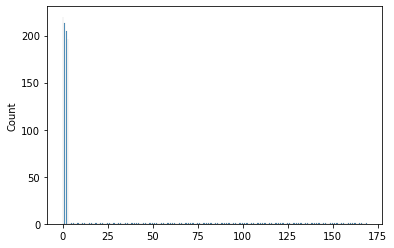

In [25]:
import seaborn as sns
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))
sns.histplot(labels) 

In [26]:
len(labels)

1000

In [34]:
interesting_clusters = 4

In [35]:
idx_to_client = {v: k for k, v in client_to_idx.items()}
clusters = [[] for z in range(interesting_clusters)]
for idx, label in enumerate(labels):
    if label < interesting_clusters:
        clusters[label].append(idx_to_client[idx])

In [39]:
clusters[0]

[0,
 2,
 3,
 7,
 8,
 10,
 12,
 13,
 14,
 15,
 17,
 20,
 22,
 24,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 66,
 67,
 69,
 70,
 71,
 73,
 75,
 76,
 78,
 79,
 80,
 83,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 93,
 94,
 96,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 130,
 132,
 134,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 155,
 156,
 157,
 158,
 161,
 162,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 204,
 207,
 209,
 210,
 211,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 225,
 226,
 229,
 231,
 232,
 233,
 234,
 236,
 237,